<h2 align="center">Predict Employee Churn with Decision Trees and Random Forests</h2>

### Project Structure

The hands on project on Predict Employee Churn with Decision Trees and Random Forests is divided into the following tasks:

#### Task 1: Introduction and Import Libraries

- Introduction to the data set and the problem overview.
- See a demo of the final product you will build by the end of this project.
- Import essential modules and helper functions from NumPy, Matplotlib, and scikit-learn.



In [26]:
# pip install pandas-profiling

In [27]:
# pip install yellowbrick


In [28]:
# pip install graphviz

In [45]:
conda install python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                  -failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - alabaster -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0']
  - anaconda-navigator -> python[version='>=3.9,<3.10.0a0']
  - anaconda-project -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|>=3.7,<3.8.0a0|>=3.6,<3.7.0a0']
  - anaconda==2020.07 -> python[version='3.6.10|3.7.7|3.8.3',build='hf48f09d_2|hf48f09d

patsy -> python[version='>=3.8,<3.9.0a0'] -> sqlite[version='>=3.20.1,<4.0a0|>=3.22.0,<4.0a0|>=3.23.1,<4.0a0|>=3.24.0,<4.0a0|>=3.25.2,<4.0a0|>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.27.2,<4.0a0|>=3.29.0,<4.0a0|>=3.30.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.32.3,<4.0a0|>=3.33.0,<4.0a0']
urllib3 -> python[version='<4.0'] -> sqlite[version='>=3.20.1,<4.0a0|>=3.22.0,<4.0a0|>=3.23.1,<4.0a0|>=3.24.0,<4.0a0|>=3.25.2,<4.0a0|>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.27.2,<4.0a0|>=3.29.0,<4.0a0|>=3.30.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.32.3,<4.0a0|>=3.33.0,<4.0a0']
heapdict -> python -> sqlite[version='>=3.20.1,<4.0a0|>=3.22.0,<4.0a0|>=3.23.1,<4.0a0|>=3.24.0,<4.0a0|>=3.25.2,<4.0a0|>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.27.2,<4.0a0|>=3.29.0,<4.0a0|>=3.30.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.32.3,<4.0a0|>=3.33.0,<4.0a0']
scikit-learn -> python[version='>=3.7,<3.8.0a0'] -> sqlite[version='>=3.20.1,<4.0a0|>=3.22.0,<4.0a0|>=3.23.1,<4.0a0|>=3.24.0,<4.0a0|>=3.25.2,<4.0a0|>=3.25.3,<4.0a0|>=3.26


Note: you may need to restart the kernel to use updated packages.


In [4]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [5]:
plt.rcParams['figure.figsize'] = (12,8)
# to be all figures in this notebook the same size


#### Task 2: Exploratory Data Analysis

- Load the employee dataset using pandas
- Explore the data visually by graphing various features against the target with Matplotlib.

In [6]:
df = pd.read_csv('data/employee_data.csv')

In [7]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [8]:
df.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          quit  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [10]:
df.profile_report(title="Employee Data")

In [11]:
df.drop_duplicates(keep=False,inplace=True) 


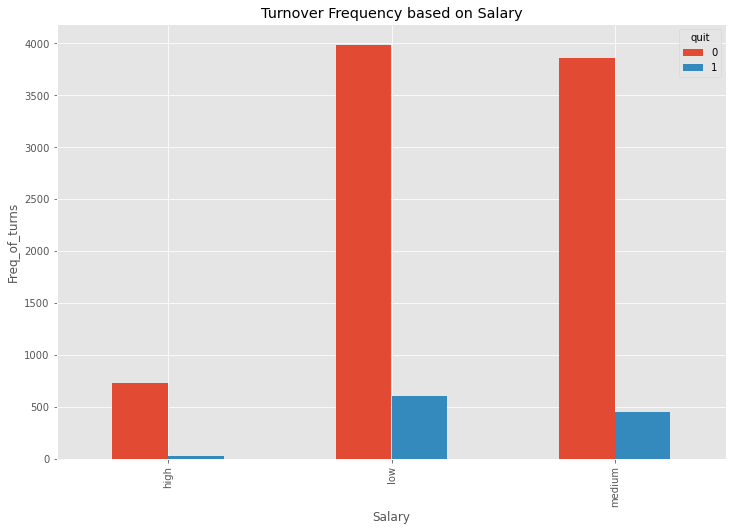

In [12]:
pd.crosstab(df.salary, df.quit).plot(kind='bar')
plt.title("Turnover Frequency based on Salary")
plt.xlabel("Salary")
plt.ylabel("Freq_of_turns")
plt.show()
#Much less frequency of turnover at higher salary

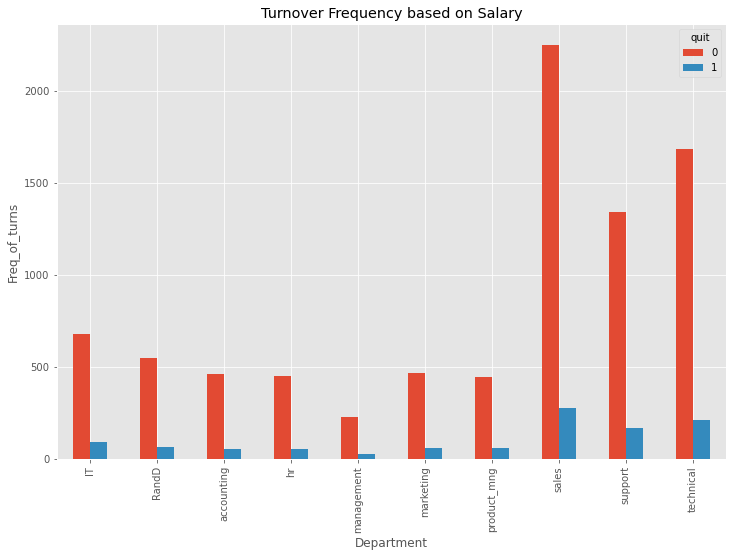

In [13]:
pd.crosstab(df.department, df.quit).plot(kind='bar')
plt.title("Turnover Frequency based on Salary")
plt.xlabel("Department")
plt.ylabel("Freq_of_turns")
plt.show()

#### Task 3: Encode Categorical Features

- The dataset contains two categorical variables: Department and Salary.
- Create dummy encoded variables for both categorical variables.

ML models prefer working with numeric data. so we need to convert categorical dataa to numeric using on-hot encoding

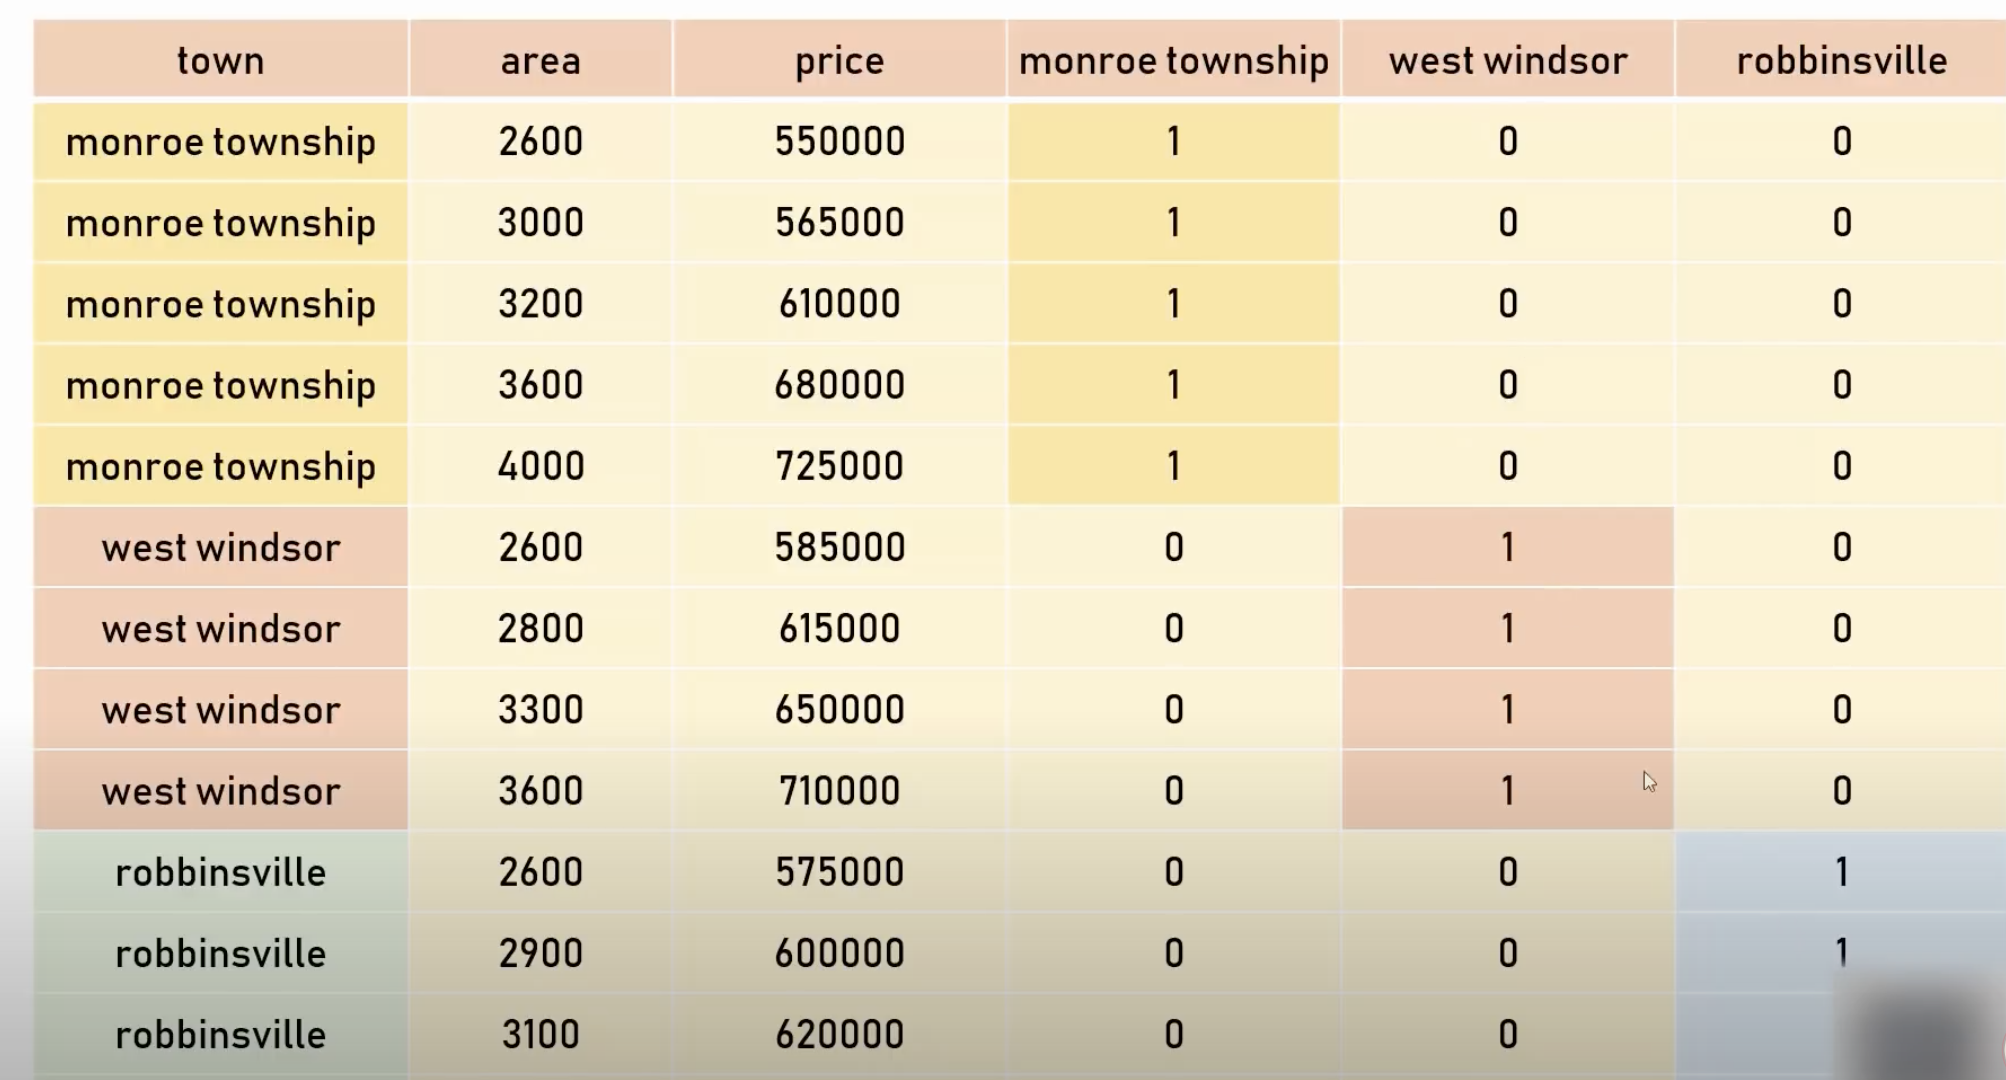

In [14]:
from IPython.display import Image
Image("images/dummy_variavles.png")

the three columns (monroe township,...) are dummy variables

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9653 entries, 783 to 10571
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     9653 non-null   float64
 1   last_evaluation        9653 non-null   float64
 2   number_project         9653 non-null   int64  
 3   average_montly_hours   9653 non-null   int64  
 4   time_spend_company     9653 non-null   int64  
 5   Work_accident          9653 non-null   int64  
 6   quit                   9653 non-null   int64  
 7   promotion_last_5years  9653 non-null   int64  
 8   department             9653 non-null   object 
 9   salary                 9653 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 829.6+ KB


In [16]:
cat_vars = ['department','salary']
for var in cat_vars:
    dummies = pd.get_dummies(df[var], prefix=var)
    df=df.join(dummies)

In [17]:
df.drop(columns=['department','salary'], axis=1, inplace=True)

#### Task 4: Visualize Class Imbalance

- Use Yellowbrick's Class Balance visualizer to create a frequency plot of both classes.
- The presence or absence of a class balance problem will inform your sampling strategory while creating training and validation sets.

In [18]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)



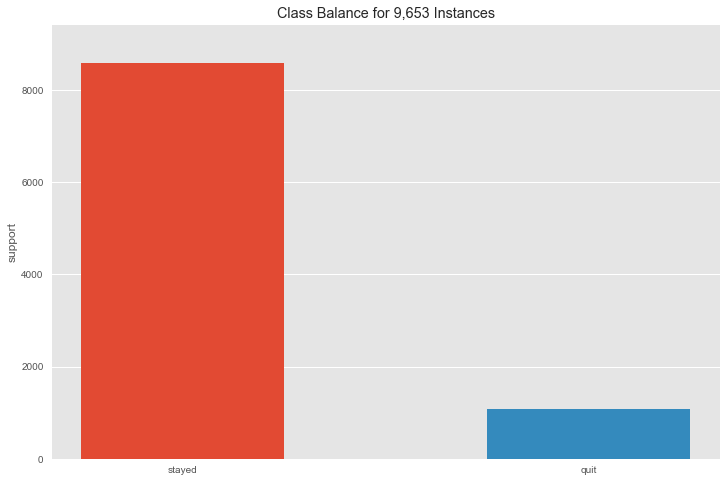

In [19]:
visualizer = ClassBalance(labels=['stayed','quit']).fit(df.quit)
visualizer.show()

#### Task 5: Create Training and Validation Sets

- Split the data into a 80/20 training/validation split.
- Use a stratified sampling strategy

In this context, stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset. It is useful to avoid classification problems that do not have a balanced number of examples for each class label.

In [20]:
X = df.loc[:, df.columns != 'quit']
y = df.quit

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train,y_test = train_test_split(X, y 
                                                   , random_state=0
                                                   , test_size=0.2
                                                   , stratify=y) 

#### Tasks 6 & 7: Build a Decision Tree Classifier with Interactive Controls

- Use the interact function to automatically create UI controls for function arguments.
- Build and train a decision tree classifier with scikit-learn.
- Calculate the training and validation accuracies.
- Display the fitted decision tree graphically.

In [23]:
from ipywidgets import interactive, IntSlider, FloatSlider, interact
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [24]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=1,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator = DecisionTreeClassifier(random_state=0,
                                      criterion=crit,
                                      splitter=split,
                                      max_depth=depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf=min_leaf)
    estimator.fit(X_train, y_train)
    print('Decision Tree Training Acc:{:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Decision Tree Test Acc:{:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    
    
    graph = Source(tree.export_graphviz(estimator,out_file=None,
                                       feature_names=X_train.columns,
                                       class_names=['stayed', 'quit'],
                                       filled=True))
    
    display(Image(data=graph.pipe(format='png')))
    
    #do later
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

![partition](assets/partition-feature-space.png)

- Decision trees generally have low bias but have high variance.
- We will solve the high variance problem in Task 8.

#### Task 8: Build a Random Forest Classifier with Interactive Controls

- Use the interact function again to automatically create UI controls for function arguments.
- To overcome the variance problem associated with decision trees, build and train a random forests classifier with scikit-learn.
- Calculate the training and validation accuracies.
- Display a fitted tree graphically.


In [25]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=7,value=2, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator = RandomForestClassifier(random_state=0,
                                       criterion=crit,
                                       bootstrap=bootstrap,
                                       max_depth=depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf,
                                       n_jobs=1,
                                       verbose=False).fit(X_train, y_train)
    
    estimator.fit(X_train, y_train)

    print('Random Forest Training Acc:{:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Random Forest Test Acc:{:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    num_tree=estimator.estimators_[5]
    print('Visualizing Tree:', 0)
    
    graph = Source(tree.export_graphviz(num_tree,
                                        out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['stayed', 'quit'],
                                        filled=True))
    
    display(Image(data=graph.pipe(format='png')))
    
        #do later
    return estimator 
   

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…


#### Task 9: Feature Importance Plots and Evaluation Metrics

- Many model forms describe the underlying impact of features relative to each other.
- Decision Tree models and Random Forest in scikit-learn, feature_importances_ attribute when fitted.
- Utilize this attribute to rank and plot the features.

In [53]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

It shows more feature, that's becuase RandomForestClassifier is more accurate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ValueError: could not convert string to float: 'IT'

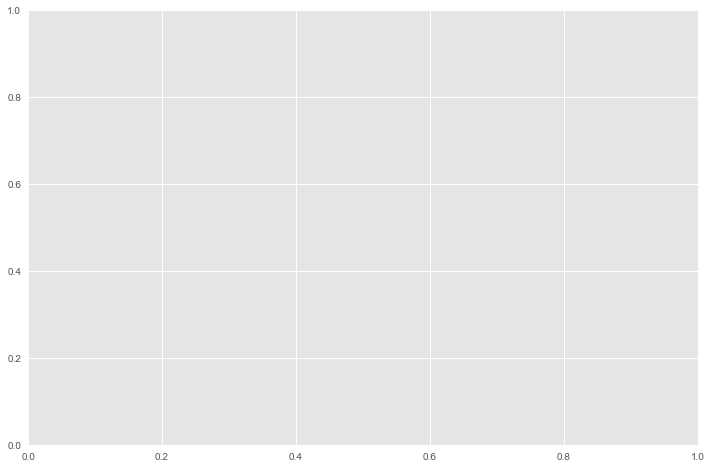

In [54]:
rf = RandomForestClassifier(bootstrap='True', 
                            max_depth=2, 
                            n_jobs=1, 
                            random_state=0,
                            verbose=False)
viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show();

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ValueError: could not convert string to float: 'IT'

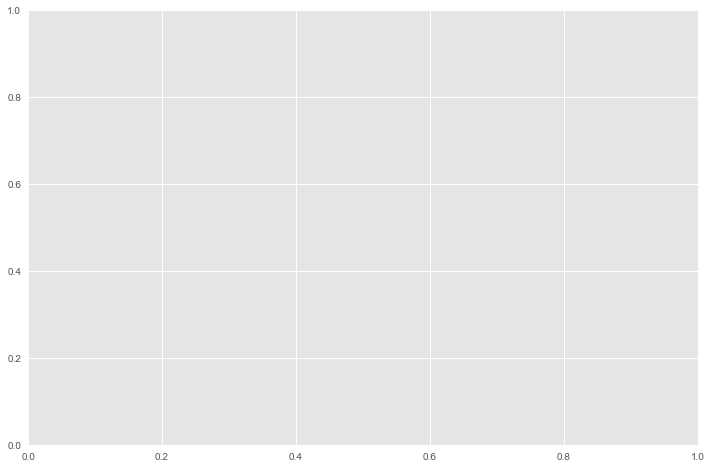

In [55]:
dt = DecisionTreeClassifier(max_depth=5, random_state=0)
viz = FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show()